In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les fichiers CSV pour une année donnée
def load_data_for_year(year):
    season_file = f'/ift6758_projet-main/ift6758/data/{year}/season.csv'
    playoffs_file = f'/ift6758_projet-main/ift6758/data/{year}/playoffs.csv'

    
    # Charger les deux fichiers CSV (saison et playoffs)
    season_df = pd.read_csv(season_file)
    playoffs_df = pd.read_csv(playoffs_file)
    
    # Concaténation des deux DataFrames
    return pd.concat([season_df, playoffs_df], ignore_index=True)

# Charger les données de toutes les années de 2016 à 2023
all_years_df = pd.concat([load_data_for_year(year) for year in range(2016, 2024)], ignore_index=True)

# Afficher les colonnes disponibles
print(all_years_df.columns)


Index(['game_id', 'period', 'time_in', 'time_remaining', 'team_id', 'is_goal',
       'x_coord', 'y_coord', 'shooter_name', 'goalie_name', 'shot_type',
       'is_empty_net', 'situation_type'],
      dtype='object')


In [22]:
# Agréger les données par type de tir
df_aggregated = all_years_df.groupby('shot_type').agg(
    shots=('shot_type', 'size'),  # Compter tous les tirs
    goals=('is_goal', 'sum')      # Somme des buts
).reset_index()

# Vérifier les données agrégées
print(df_aggregated.head())


      shot_type  shots  goals
0      backhand  51653   6015
1           bat    463    118
2  between-legs    108     17
3        cradle      8      4
4     deflected  11356   1853


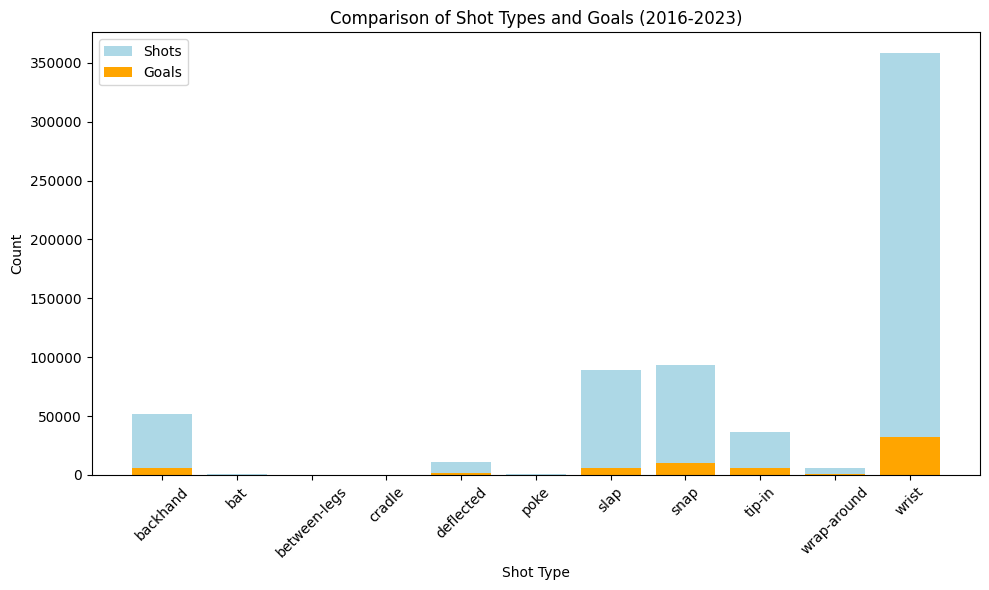

In [23]:
# Créer le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les tirs
ax.bar(df_aggregated['shot_type'], df_aggregated['shots'], label='Shots', color='lightblue')

# Barres pour les buts (superposées)
ax.bar(df_aggregated['shot_type'], df_aggregated['goals'], label='Goals', color='orange')

# Ajouter les légendes et afficher
ax.set_xlabel('Shot Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of Shot Types and Goals (2016-2023)')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


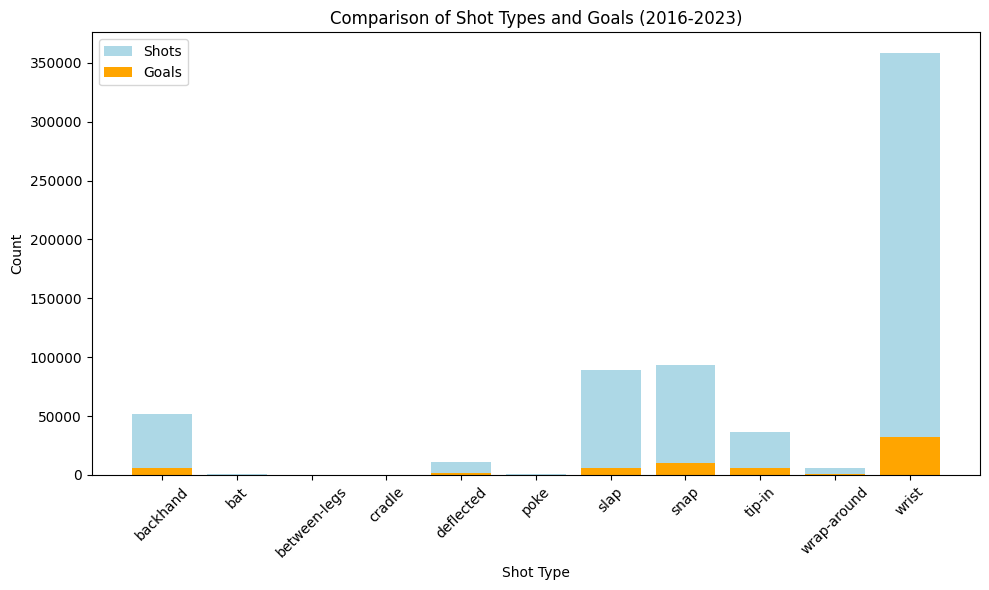

In [24]:
# Créer le graphique avec les données agrégées
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les tirs
ax.bar(df_aggregated['shot_type'], df_aggregated['shots'], label='Shots', color='lightblue')

# Barres pour les buts (superposées)
ax.bar(df_aggregated['shot_type'], df_aggregated['goals'], label='Goals', color='orange')

# Ajouter les légendes et afficher
ax.set_xlabel('Shot Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of Shot Types and Goals (2016-2023)')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Calculer la distance du tir au but
def calculate_distance(df):
    # La distance euclidienne des coordonnées x et y
    df['distance'] = np.sqrt(df['x_coord']**2 + df['y_coord']**2)
    return df

# Charger les données pour les saisons 2018-19, 2019-20 et 2020-21
years = [2018, 2019, 2020]
dataframes = [calculate_distance(load_data_for_year(year)) for year in years]


In [26]:
# Calculer le ratio de buts par distance pour chaque saison
def goal_probability_by_distance(df):
    # Grouper par distance et calculer le nombre de tirs et de buts
    grouped = df.groupby('distance').agg(shots=('is_goal', 'size'), goals=('is_goal', 'sum'))
    
    # Calculer la probabilité de but pour chaque distance
    grouped['goal_probability'] = grouped['goals'] / grouped['shots']
    
    # Remplacer les valeurs NaN par 0 
    grouped['goal_probability'] = grouped['goal_probability'].fillna(0)
    
    return grouped.reset_index()

# Calculer les probabilités pour chaque saison
goal_probabilities = [goal_probability_by_distance(df) for df in dataframes]

# Afficher toutes les lignes des résultats pour la saison 2018-19
print(goal_probabilities)


[        distance  shots  goals  goal_probability
0       0.000000      5      1               0.2
1       1.000000      5      1               0.2
2       1.414214     11      0               0.0
3       2.000000      4      0               0.0
4       2.236068     12      0               0.0
...          ...    ...    ...               ...
2328  101.202767      1      0               0.0
2329  101.237345      1      1               1.0
2330  101.390335      1      0               0.0
2331  101.921538      1      1               1.0
2332  102.107786      1      0               0.0

[2333 rows x 4 columns],         distance  shots  goals  goal_probability
0       0.000000      2      0               0.0
1       1.000000      6      0               0.0
2       1.414214      3      0               0.0
3       2.000000      6      0               0.0
4       2.236068     11      0               0.0
...          ...    ...    ...               ...
2298   99.045444      1      1            

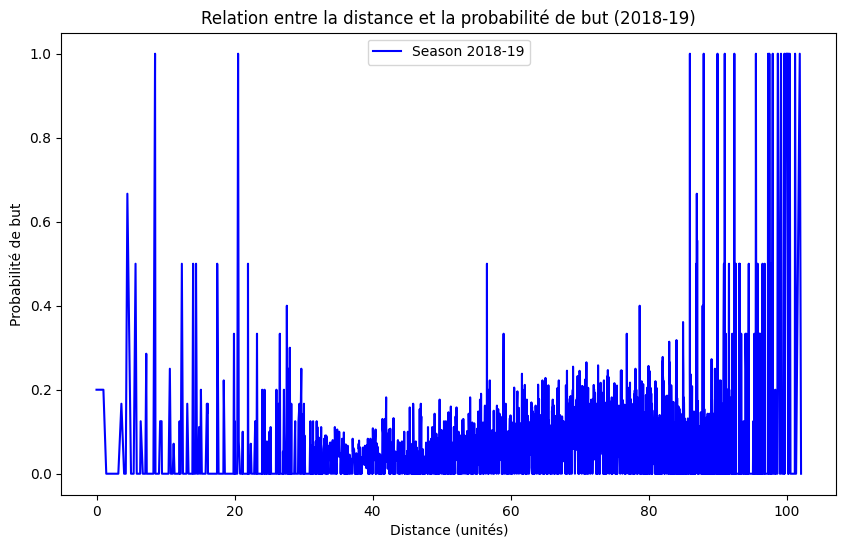

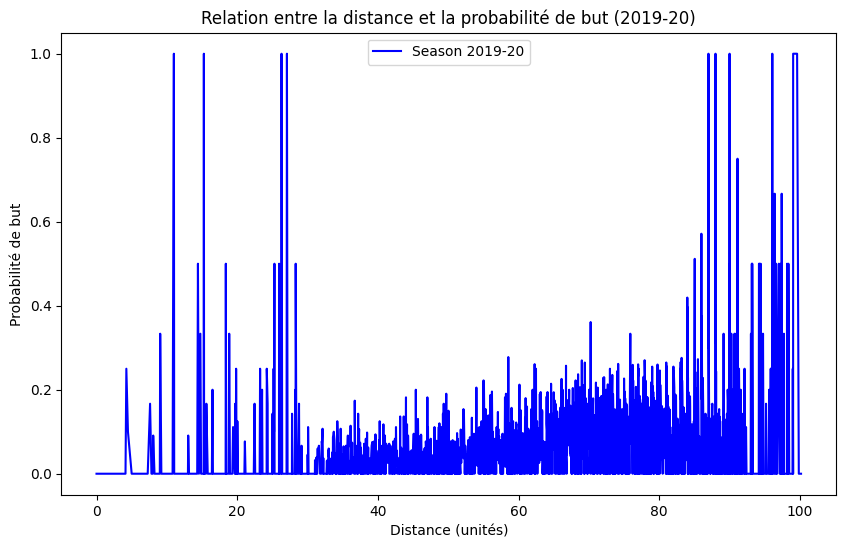

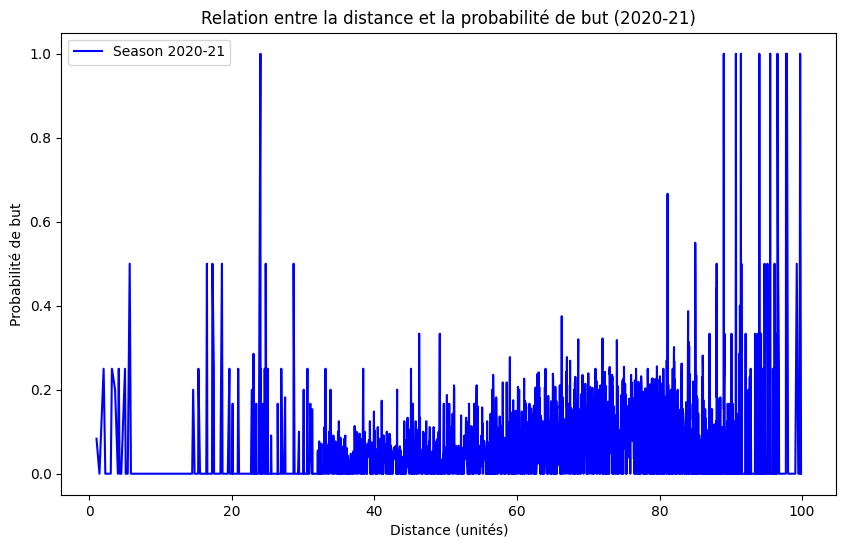

In [27]:
# Créer un graphique pour chaque saison
seasons = ['2018-19', '2019-20', '2020-21']

for i, df in enumerate(goal_probabilities):
    plt.figure(figsize=(10, 6))
    
    # Tracer la probabilité de but en fonction de la distance
    plt.plot(df['distance'], df['goal_probability'], label=f'Season {seasons[i]}', color='blue')
    
    # Ajouter les légendes et les titres
    plt.xlabel('Distance (unités)')
    plt.ylabel('Probabilité de but')
    plt.title(f'Relation entre la distance et la probabilité de but ({seasons[i]})')
    plt.legend()
    
    plt.show()


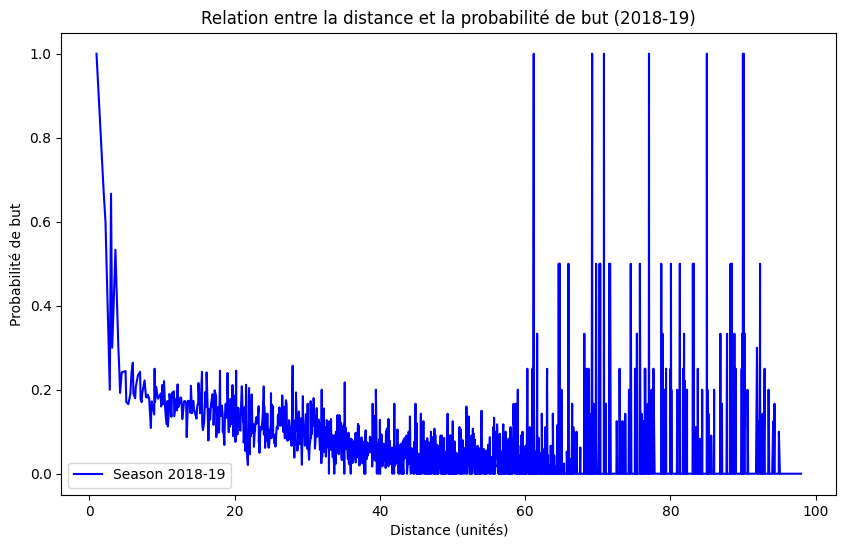

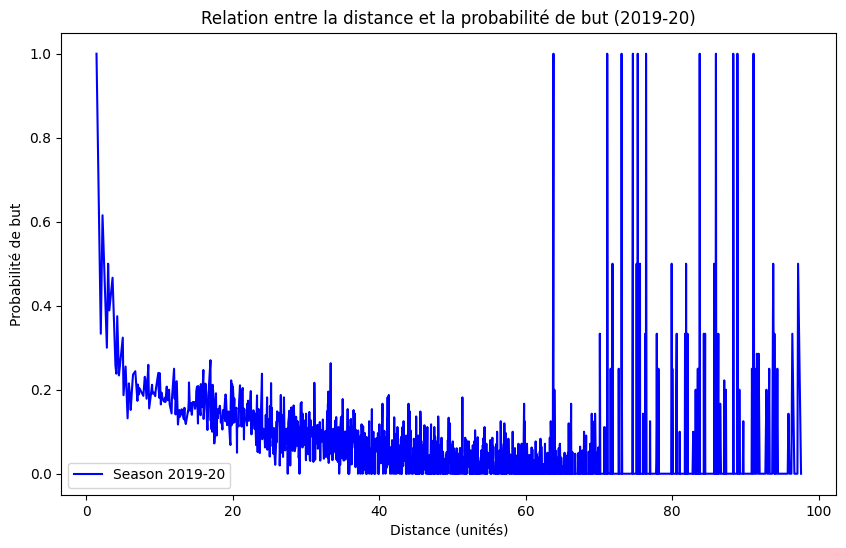

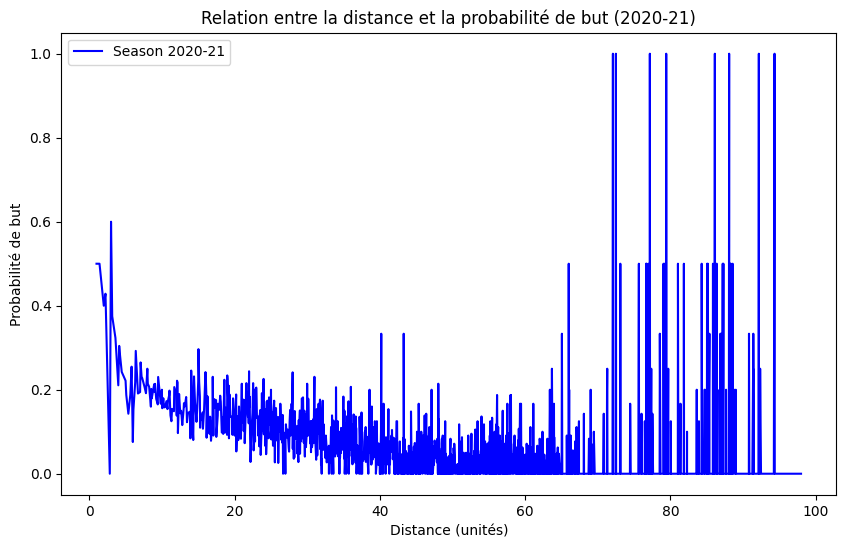

In [28]:

# Fonction pour calculer la distance d'un tir par rapport au but
def calculate_distance(df):
    # Le but est supposé être à (89, 0) ou (-89, 0)
    df['goal_x'] = np.where(df['x_coord'] > 0, 89, -89)  
    df['goal_y'] = 0  # Le but est centré sur l'axe y

    # Calcul de la distance euclidienne
    df['distance'] = np.sqrt((df['x_coord'] - df['goal_x'])**2 + (df['y_coord'] - df['goal_y'])**2)
    
    # Gérer les données manquantes
    df = df.dropna(subset=['x_coord', 'y_coord'])
    
    return df

# Fonction pour calculer la probabilité de but en fonction de la distance
def goal_probability_by_distance(df):
    grouped = df.groupby('distance').agg(shots=('is_goal', 'size'), goals=('is_goal', 'sum'))
    grouped['goal_probability'] = grouped['goals'] / grouped['shots']
    return grouped.reset_index()

# Charger les données pour les saisons 2018-19, 2019-20 et 2020-21
years = [2018, 2019, 2020]
dataframes = [calculate_distance(load_data_for_year(year)) for year in years]

# Calculer les probabilités pour chaque saison
goal_probabilities = [goal_probability_by_distance(df) for df in dataframes]

# Créer un graphique pour chaque saison
seasons = ['2018-19', '2019-20', '2020-21']

for i, df in enumerate(goal_probabilities):
    plt.figure(figsize=(10, 6))
    
    # Tracer la probabilité de but en fonction de la distance
    plt.plot(df['distance'], df['goal_probability'], label=f'Season {seasons[i]}', color='blue')
    
    # Ajouter les légendes et les titres
    plt.xlabel('Distance (unités)')
    plt.ylabel('Probabilité de but')
    plt.title(f'Relation entre la distance et la probabilité de but ({seasons[i]})')
    plt.legend()
    
   
    plt.show()


In [29]:
# Fonction pour calculer la distance d'un tir par rapport au but
def calculate_distance(df):
    # Le but est supposé être à (89, 0) ou (-89, 0)
    df['goal_x'] = np.where(df['x_coord'] > 0, 89, -89)  # But à 89 ou -89 en fonction du côté
    df['goal_y'] = 0  # Le but est centré sur l'axe y

    # Calcul de la distance euclidienne
    df['distance'] = np.sqrt((df['x_coord'] - df['goal_x'])**2 + (df['y_coord'] - df['goal_y'])**2)
    
    # Gérer les données manquantes
    df = df.dropna(subset=['x_coord', 'y_coord', 'shot_type'])
    
    return df

# Fonction pour calculer le pourcentage de buts par distance et type de tir
def goal_percentage_by_distance_and_type(df):
    # Grouper par distance et type de tir, et calculer le nombre de tirs et de buts
    grouped = df.groupby(['distance', 'shot_type']).agg(shots=('is_goal', 'size'), goals=('is_goal', 'sum'))
    
    # Calculer le pourcentage de buts
    grouped['goal_percentage'] = grouped['goals'] / grouped['shots']
    
    return grouped.reset_index()

# Charger et calculer la distance pour toutes les années (de 2018 à 2020)
years = [2018, 2019, 2020]
all_years_data = pd.concat([calculate_distance(load_data_for_year(year)) for year in years], ignore_index=True)

# Calculer le pourcentage de buts en fonction de la distance et du type de tir pour toutes les saisons combinées
goal_data = goal_percentage_by_distance_and_type(all_years_data)

# Afficher les premières lignes des résultats
print(goal_data.head())


   distance  shot_type  shots  goals  goal_percentage
0  1.000000  deflected      1      1         1.000000
1  1.000000      wrist      3      2         0.666667
2  1.414214  deflected      1      1         1.000000
3  1.414214      wrist      3      2         0.666667
4  2.000000   backhand      2      1         0.500000


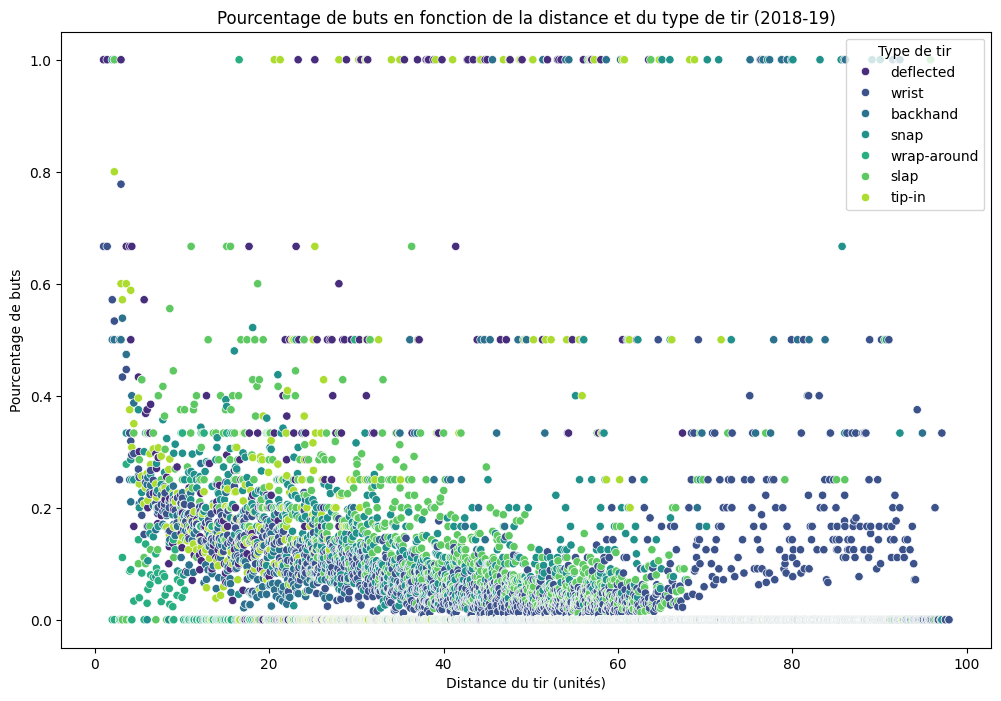

In [30]:
import seaborn as sns

# Créer un graphique avec distance et type de tir
plt.figure(figsize=(12, 8))

# Utiliser seaborn pour un scatterplot 
sns.scatterplot(x='distance', y='goal_percentage', hue='shot_type', data=goal_data, palette='viridis')

# Ajouter les légendes et les titres
plt.xlabel('Distance du tir (unités)')
plt.ylabel('Pourcentage de buts')
plt.title('Pourcentage de buts en fonction de la distance et du type de tir (2018-19)')

# Afficher le graphique
plt.legend(title="Type de tir")
plt.show()
